In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Bhavya\Downloads\Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.shape

(30, 2)

In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
import seaborn as sns

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_18068\3871720387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

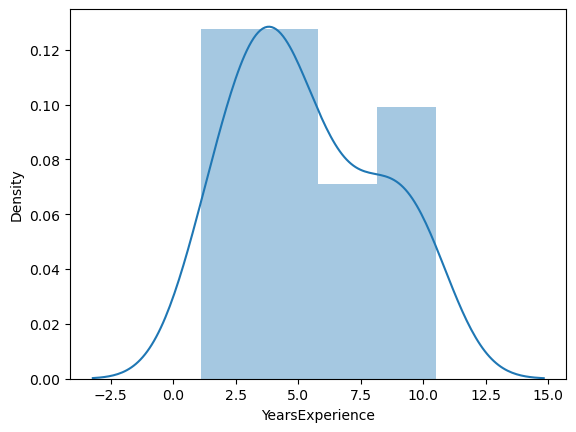

In [13]:
sns.distplot(df['YearsExperience'])

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_18068\3249851952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

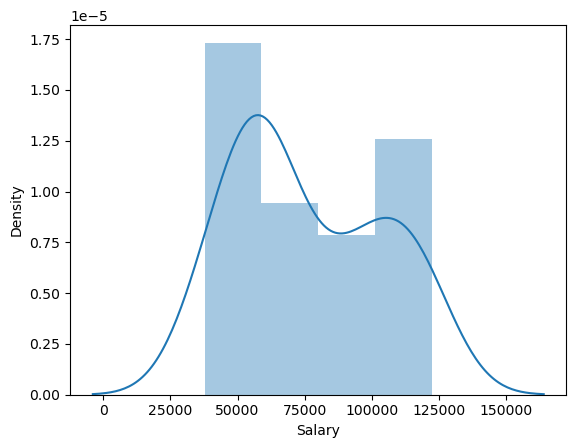

In [15]:
sns.distplot(df['Salary'])

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dr=DecisionTreeRegressor(max_depth=3,max_leaf_nodes=3,min_samples_split=3)

In [22]:
dr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=3, min_samples_split=3)

In [23]:
y_pred=dr.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [26]:
import numpy as np

In [31]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)

In [41]:
f"the performance of model is mse: {mse},mae is : {mae} and r2_score is :{r2},rmse : {rmse}"

'the performance of model is mse: 59316103.552103885,mae is : 5728.7307692307695 and r2_score is :0.9415541939328902,rmse : 7701.694849324003'

In [35]:
import pickle

In [36]:
with open('decisiontree.pkl','wb')as s:
    pickle.dump(dr,s)